<a href="https://colab.research.google.com/github/masud770/AI-and-Machine-Learning-Practice-Examples/blob/main/Outlier_handling(AI_10_9).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('/content/placement.csv')

In [4]:
df.shape

(1000, 3)

In [5]:
df.sample(5)

,cgpa,placement_exam_marks,placed
555,6.46,32.0,0
500,6.07,24.0,1
950,6.65,33.0,1
620,7.07,18.0,1
905,7.08,29.0,0


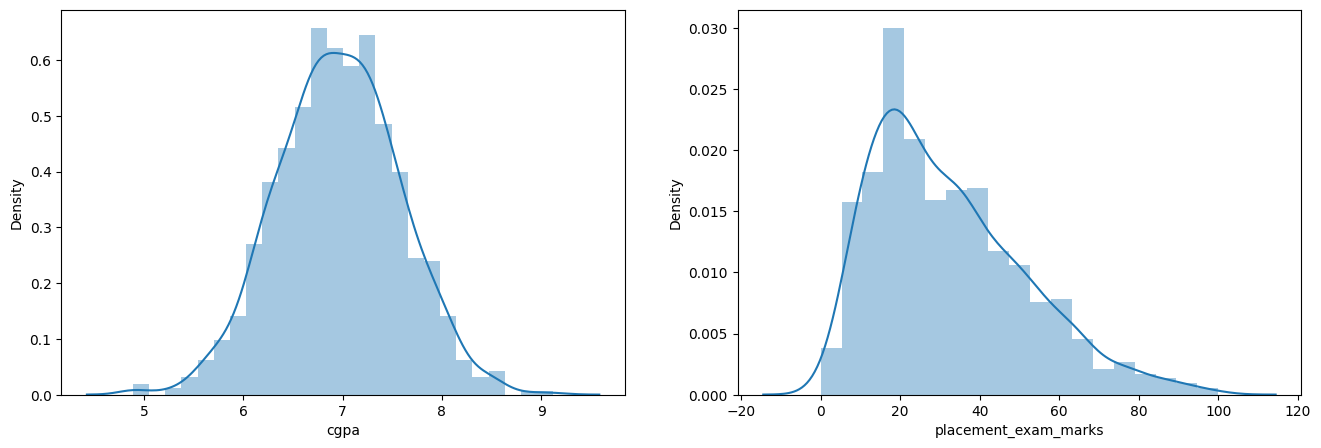

In [6]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])

plt.show()

# **Outlier in Normal Distribution (Cgpa)**

In [7]:
df['cgpa'].skew()

-0.014529938929314918

In [8]:
print("Mean value of cgpa",df['cgpa'].mean())
print("Std value of cgpa",df['cgpa'].std())
print("Min value of cgpa",df['cgpa'].min())
print("Max value of cgpa",df['cgpa'].max())

Mean value of cgpa 6.96124
Std value of cgpa 0.6158978751323896
Min value of cgpa 4.89
Max value of cgpa 9.12


# **Trimming**

**Handling outliers using boundary
values**






In [ ]:
# upper limit= mean + 3*std
# lower limit= mean - 3*std

In [9]:
# Finding the boundary values
upper_limit= df['cgpa'].mean() + 3*df['cgpa'].std()
lower_limit= df['cgpa'].mean() - 3*df['cgpa'].std()

In [10]:
# Finding outlier
outlier = df[(df['cgpa'] > upper_limit) | (df['cgpa'] < lower_limit)]
outlier

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [11]:
# Removing outlier
new_df = df[(df['cgpa'] < upper_limit) & (df['cgpa'] > lower_limit)]
new_df.shape

(995, 3)

**Handling outliers using the Zscore**

In [ ]:
# z = (x- mean)/std

In [ ]:
# Finding the z score
df['cgpa_zscore'] = (df['cgpa'] - df['cgpa'].mean())/df['cgpa'].std()

In [ ]:
# Finding outlier
outlier = df[(df['cgpa_zscore'] > 3) | (df['cgpa_zscore'] < -3)]
outlier

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [ ]:
new_df1 = df[(df['cgpa_zscore'] < 3 ) & (df['cgpa_zscore'] > -3)]
new_df1.shape

(995, 4)

<AxesSubplot:xlabel='cgpa'>

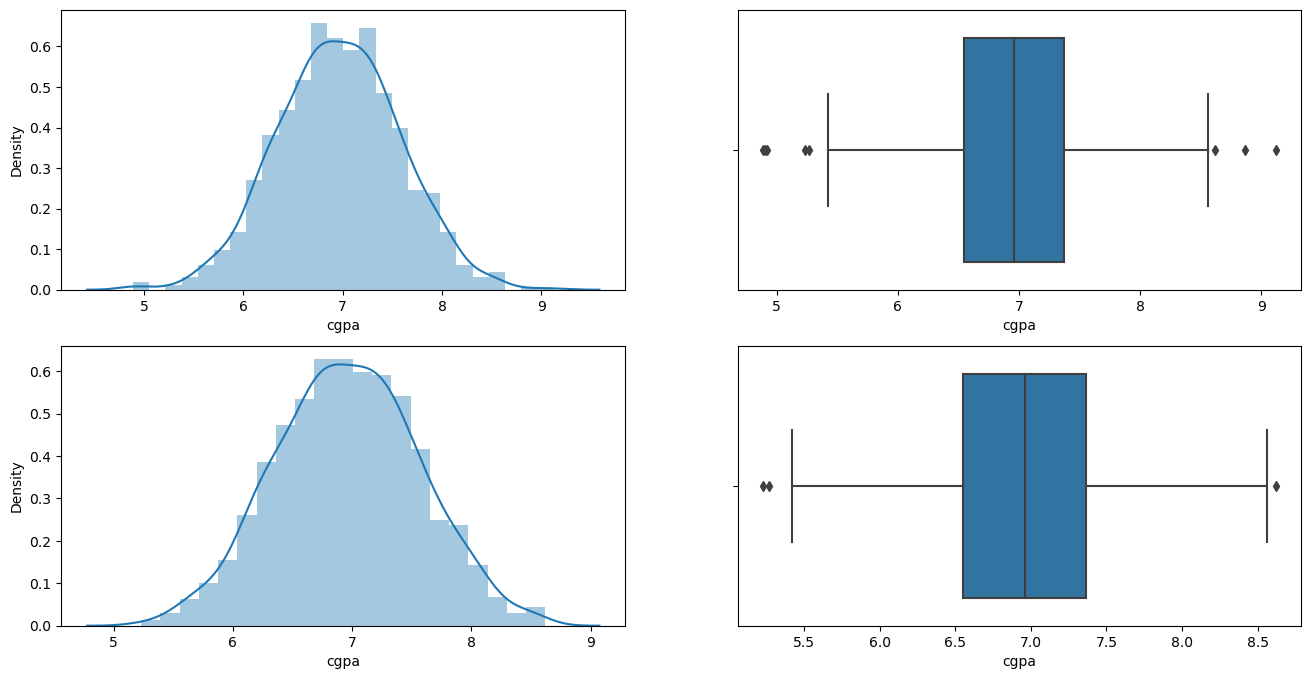

In [ ]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['cgpa'])

plt.subplot(2,2,2)
sns.boxplot(df['cgpa'])

plt.subplot(2,2,3)
sns.distplot(new_df1['cgpa'])

plt.subplot(2,2,4)
sns.boxplot(new_df1['cgpa'])


# **Capping**

In [ ]:
#np.where(condition, true, false)
df2=df.copy()
df2['cgpa'] = np.where(
    df2['cgpa']>upper_limit,
    upper_limit,
    np.where(
        df2['cgpa']<lower_limit,
        lower_limit,
        df2['cgpa']
    )
)



<AxesSubplot:xlabel='cgpa'>

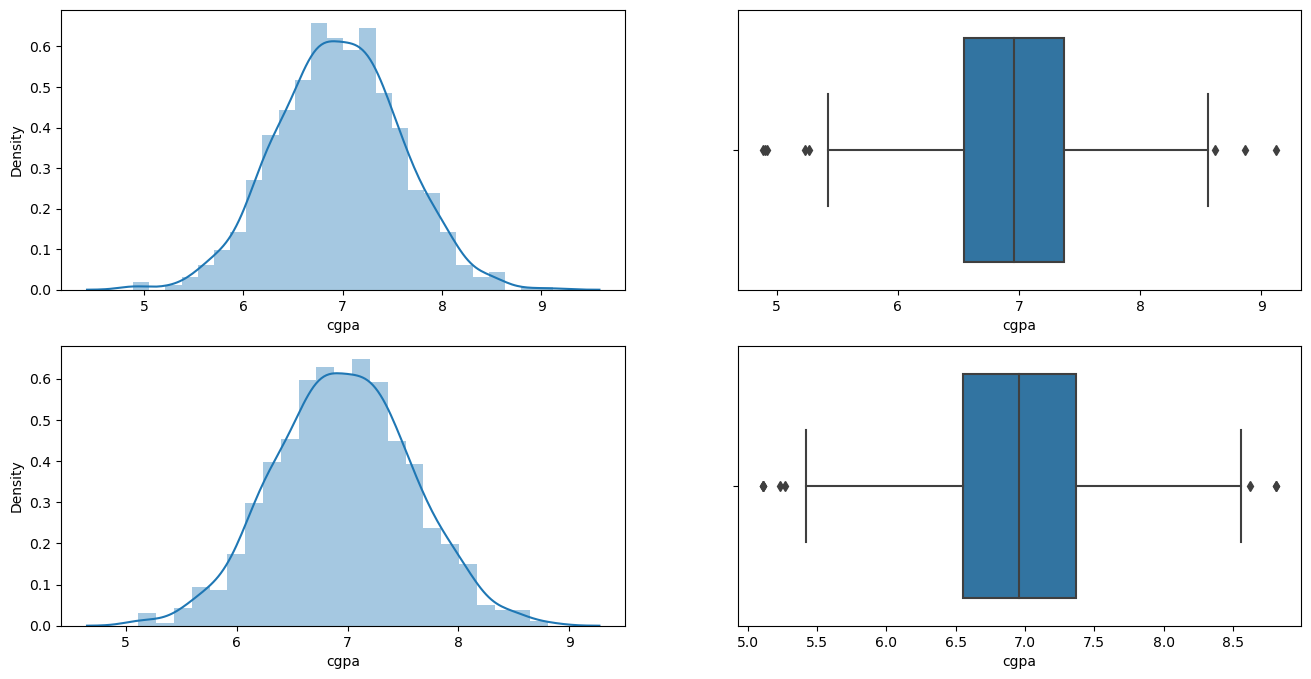

In [ ]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['cgpa'])

plt.subplot(2,2,2)
sns.boxplot(df['cgpa'])

plt.subplot(2,2,3)
sns.distplot(df2['cgpa'])

plt.subplot(2,2,4)
sns.boxplot(df2['cgpa'])


In [ ]:
df.shape

(1000, 4)

In [ ]:
df['cgpa'].describe()

count    1000.000000
mean        6.961240
std         0.615898
min         4.890000
25%         6.550000
50%         6.960000
75%         7.370000
max         9.120000
Name: cgpa, dtype: float64

# **Outlier in Skewed distribution (placement_exam_marks)**

In [ ]:
df['placement_exam_marks'].skew() #Left Skewed

0.8356419499466834

In [ ]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<AxesSubplot:xlabel='placement_exam_marks'>

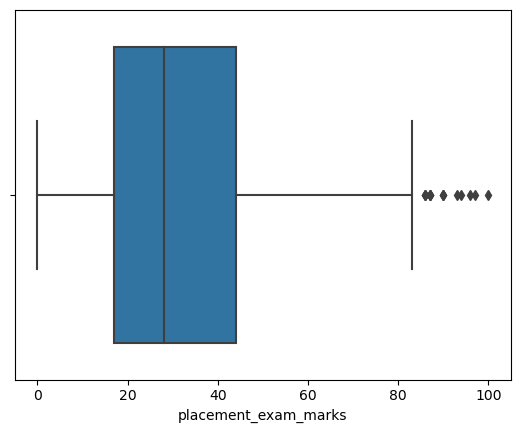

In [ ]:
sns.boxplot(df['placement_exam_marks'])

In [ ]:
# Finding the IQR
percentile25 = df['placement_exam_marks'].quantile(0.25)
percentile75 = df['placement_exam_marks'].quantile(0.75)

In [ ]:
iqr=percentile75-percentile25
iqr

27.0

In [ ]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [ ]:
outlier= df[(df['placement_exam_marks']>upper_limit) |
         (df['placement_exam_marks']<lower_limit)]
outlier.shape

(15, 4)

# **Trimming**

In [ ]:
new_df2 = df[(df['placement_exam_marks']<upper_limit) &
         (df['placement_exam_marks']>lower_limit)]

new_df2

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
998,8.62,46.0,1,2.693239


<AxesSubplot:xlabel='placement_exam_marks'>

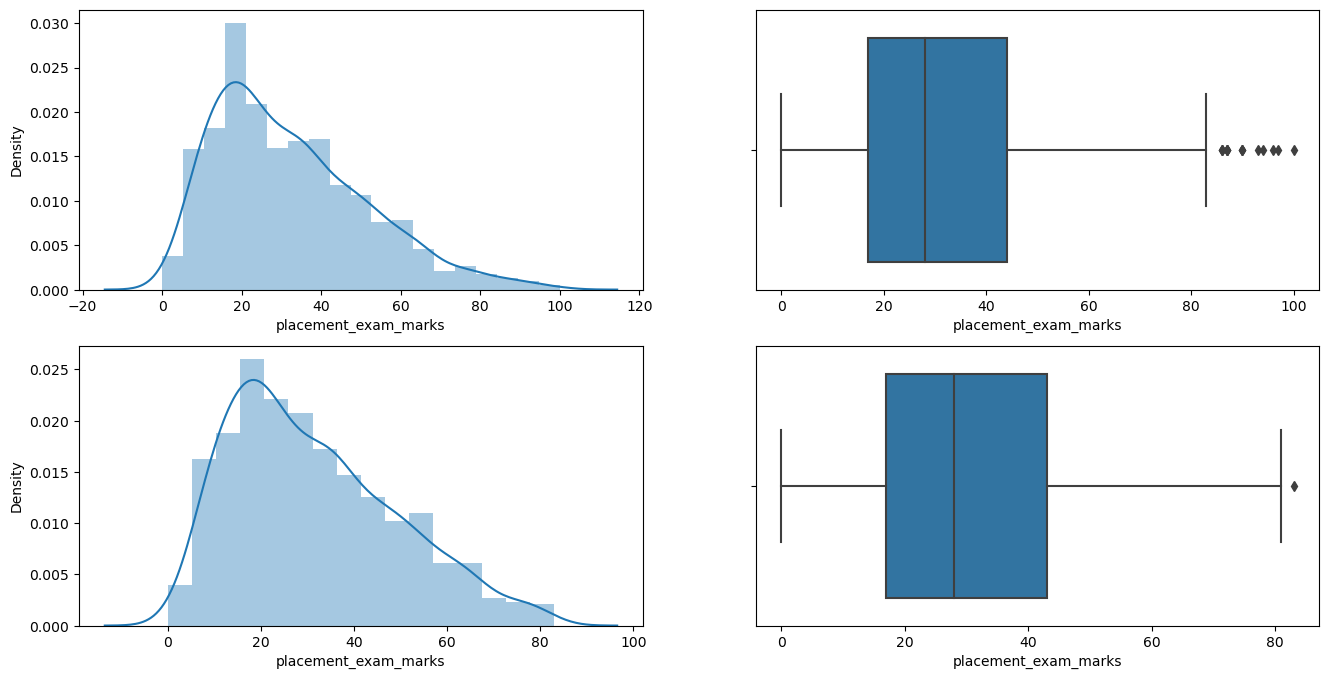

In [ ]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.distplot(new_df2['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(new_df2['placement_exam_marks'])


# **Capping**

In [ ]:
df1 = df.copy()
df1['placement_exam_marks'] = np.where(
    df1['placement_exam_marks'] > upper_limit,
    upper_limit,
    np.where(
       df1['placement_exam_marks'] < lower_limit,
        lower_limit,
        df1['placement_exam_marks']
    )
)
df1.shape

(1000, 4)

<AxesSubplot:xlabel='placement_exam_marks'>

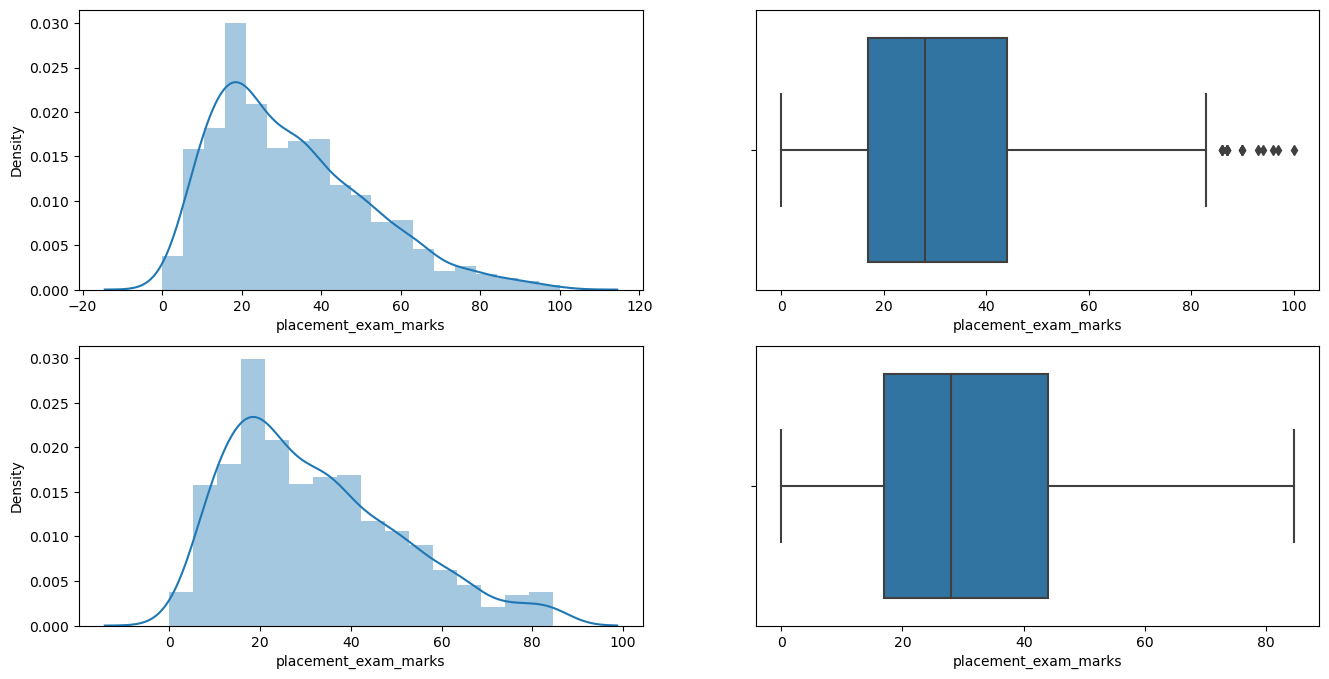

In [ ]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.distplot(df1['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(df1['placement_exam_marks'])
